In [1]:
# 시작

import numpy as np
import tensorflow as tf
import os
import sys
# from tensorflow.nn import rnn_cell
import pickle
import gzip
import random
import time
import shutil
import brain_python4 as bp
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

def corr(x,y,n):
    lst = np.stack([x,y],axis=0).reshape(-1,n)
    df = pd.DataFrame(lst).T
    
    result = df.corr(method = 'pearson')
    
    return result # 피어슨 상관 관계 함수

n_times = 201
n_frequency = 79
n_outputs = 2

last_neurons = 40
n_neurons = [40,40,last_neurons]

load_number = ''

important_index = [100,130]
normal_range_index = [20,180]
window = 30
step = 1

learning_rate = 0.001

want_data = 500

pick_range = np.arange(0,n_frequency*2)

key = 'action'

data_base_path = "./brain_data8~50"

eeg = bp.brain_python(n_times,n_frequency,window,n_outputs,n_neurons, learning_rate)
label_list,_,_ = eeg.label_info(data_base_path)
train_data,train_data_label,_ = eeg.preprocessing(data_base_path)

final_data = train_data
final_data_label = train_data_label
final_data=np.swapaxes(final_data,1,2)

final_data =final_data[:,:,important_index[0]:important_index[1]]

C:\Users\sanguk\Anaconda3\envs\yng6012\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\sanguk\Anaconda3\envs\yng6012\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\sanguk\Anaconda3\envs\yng6012\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\sanguk\Anaconda3\envs\yng6012\lib\site-packages\tensorf

action
normal


In [2]:
loop_cycle = 0
n_data = final_data.shape[0]/2
tp_final_data_action = final_data[0:int((final_data.shape[0]/2))]
tp_final_data_normal = final_data[int(final_data.shape[0]/2):int(final_data.shape[0])]

if key == 'action':
    tp_final_data = tp_final_data_action
else :
    tp_final_data = tp_final_data_normal

n_times = tp_final_data.shape[2]
cost_data = np.zeros(n_frequency)
adr_cost_data = np.zeros([n_frequency,n_times])

In [ ]:
cost_data.shape

In [3]:
while want_data != loop_cycle:
    rand_data =0
    rand_data2=0
    prime = np.zeros(n_frequency)
    adr = np.zeros([n_frequency,4])
#     while rand_data == rand_data2:
    rand_data = random.randint(0,n_data-1)
    rand_data2 = random.randint(0,n_data-1)
    
    loop_out = 0
    end_out = window-10
    
    cycle = 0

    while n_times >= end_out:
        loop_in=0
        end_in = window-10
        percentage = (cycle/((n_times-(window-10))/step))*100
        cycle_percentage = int(percentage)
        print("["+("|"*cycle_percentage)+(" "*(100-cycle_percentage))+"]\tturn: {:d}/{:d}".format(loop_cycle,want_data),end="\r")

        while n_times >= end_in:
#             action, normal 선택해서 변경
            corr_result = (corr(tp_final_data[rand_data,:,loop_out:end_out],tp_final_data[rand_data2,:,loop_in:end_in],window-10).to_numpy()
            [pick_range[0:n_frequency],pick_range[n_frequency:n_frequency*2]])
            for nb in range(n_frequency):
                if corr_result[nb]> prime[nb]:
                    prime[nb] = corr_result[nb]
                    adr[nb,:] = [loop_out,end_out,loop_in,end_in]
            loop_in += step
            end_in += step
        cycle += 1
        loop_out += step
        end_out += step
    loop_cycle += 1
    
    cut_rank = np.count_nonzero((prime>0.85)==True)

    for num in np.flip(prime.argsort())[:cut_rank]:
        cost = int((prime[num]-0.84)*100)
        cost_data[num] += cost
        adr_cost_data[num,int(adr[num][0]):int(adr[num][1])]+=cost
        adr_cost_data[num,int(adr[num][2]):int(adr[num][3])]+=cost

In [4]:
cost_data

array([2935., 2786., 2701., 2602., 2404., 2181., 2058., 1893., 1816.,
       1783., 1751., 1727., 1684., 1580., 1558., 1655., 1631., 1540.,
       1372., 1309., 1259., 1166., 1124., 1110., 1147., 1194., 1254.,
       1324., 1314., 1270., 1244., 1273., 1342., 1274., 1251., 1238.,
       1388., 1459., 1484., 1559., 1536., 1506., 1548., 1576., 1538.,
       1485., 1469., 1507., 1561., 1684., 1751., 1769., 1734., 1658.,
       1666., 1644., 1617., 1534., 1544., 1532., 1518., 1493., 1397.,
       1442., 1549., 1635., 1691., 1781., 1899., 2062., 2242., 2422.,
       2599., 2861., 3092., 3212., 3262., 3333., 3394.])

In [9]:
adr_cost_data[8]

array([ 720.,  971., 1239., 1508., 1701., 1938., 2168., 2465., 2716.,
       2952., 3632., 3632., 3632., 3632., 3632., 3632., 3632., 3632.,
       3632., 3632., 2912., 2661., 2393., 2124., 1931., 1694., 1464.,
       1167.,  916.,  680.])

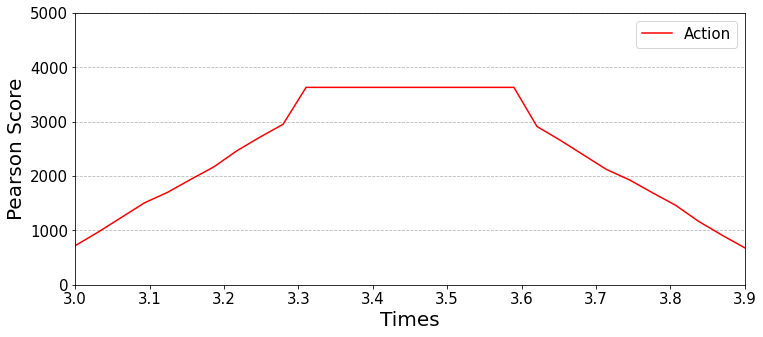

In [18]:
#1차 grab, normal data
import numpy as np
import matplotlib.pyplot as plt

a=adr_cost_data[8]

x=np.linspace(3,3.9,30)

plt.plot(x,a,label='Action',color='r')


# plt.xlim(0,4000)
# plt.ylim(0.8,1.0)
plt.xlabel("Times",fontsize=20)
plt.ylabel("Pearson Score",fontsize=20)
plt.yticks(np.arange(0.0,5000.1,step=1000),fontsize='15')
plt.xticks(np.arange(3,3.91,step=0.1),fontsize='15')
plt.rcParams['figure.figsize']=[12,5]
plt.legend(fontsize='15')
plt.grid(True,axis='y',alpha=0.9,linestyle='--')

# plt.ylim(0,80000)
plt.xlim(3,3.9)

plt.show()

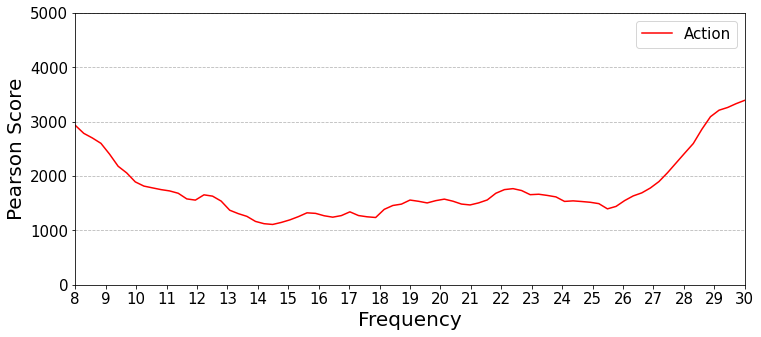

In [22]:
#1차 grab, normal data
import numpy as np
import matplotlib.pyplot as plt

a=cost_data

x=np.linspace(8,30,79)

plt.plot(x,a,label='Action',color='r')


plt.xlim(0,4000)
plt.ylim(0.8,1.0)
plt.xlabel("Frequency",fontsize=20)
plt.ylabel("Pearson Score",fontsize=20)
plt.yticks(np.arange(0.0,5000.1,step=1000),fontsize='15')
plt.xticks(np.arange(8,30.1,step=1),fontsize='15')
plt.rcParams['figure.figsize']=[12,5]
plt.legend(fontsize='15')
plt.grid(True,axis='y',alpha=0.9,linestyle='--')

plt.ylim(0,5000)
plt.xlim(8,30)

plt.show()

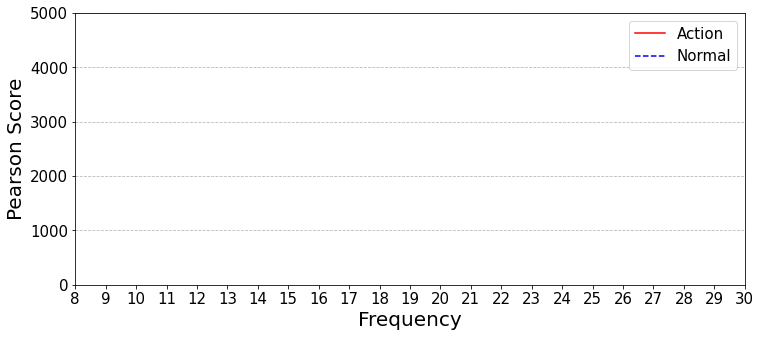

In [20]:
#1차 grab, normal data
import numpy as np
import matplotlib.pyplot as plt

a=np.array([57010., 55301., 53727., 51751., 49695., 47313., 45147., 42346.,
       38772., 35577., 34493., 33646., 32402., 30637., 29110., 28093.,
       26811., 25721., 24597., 24028., 23101., 23954., 25643., 27561.,
       29679., 31228., 31885., 30289., 28640., 28187., 28894., 29239.,
       29201., 28908., 29564., 30252., 30361., 30509., 30115., 28775.,
       26891., 26408., 27324., 28623., 29517., 31607., 32518., 31833.,
       31894., 32940., 34803., 36551., 37253., 37648., 38483., 40231.,
       40537., 39280., 39158., 38443., 37173., 36347., 34793., 33931.,
       33434., 34847., 35461., 36492., 37433., 39216., 42155., 46039.,
       49727., 53072., 56310., 59474., 61102., 62610., 62169.])
b=np.array([63634., 61184., 57110., 53780., 50449., 47140., 44373., 40670.,
       36621., 33656., 31618., 30249., 30280., 29734., 29239., 29225.,
       29283., 29690., 29658., 29722., 30184., 29004., 29012., 28662.,
       27154., 25685., 24344., 23863., 23592., 22699., 23603., 24697.,
       26026., 26397., 27449., 28298., 29524., 29928., 30991., 31253.,
       32678., 34420., 35489., 37093., 36857., 36540., 36243., 35808.,
       35136., 34591., 33942., 33314., 32203., 32024., 31858., 32886.,
       33911., 34698., 33878., 34688., 35527., 35824., 36322., 35999.,
       34847., 35404., 37186., 38796., 40657., 42803., 45641., 48129.,
       51115., 54644., 58542., 61582., 64345., 65591., 64660.])

x=np.linspace(8,30,79)

plt.plot(x,a,label='Action',color='r')
plt.plot(x,b,label='Normal',color='b',linestyle='--')


plt.xlim(0,4000)
plt.ylim(0.8,1.0)
plt.xlabel("Frequency",fontsize=20)
plt.ylabel("Pearson Score",fontsize=20)
plt.yticks(np.arange(0.0,80000.1,step=10000),fontsize='15')
plt.xticks(np.arange(8,30.1,step=1),fontsize='15')
plt.rcParams['figure.figsize']=[12,5]
plt.legend(fontsize='15')
plt.grid(True,axis='y',alpha=0.9,linestyle='--')

plt.ylim(0,80000)
plt.xlim(8,30)

plt.show()